In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [3]:
import numpy as np
from qiskit.ignis.characterization.coherence import t1_circuits

num_of_gates = np.linspace(1, 300, 5, dtype='int')
gate_time = 0.1

# Note that it is possible to measure several qubits in parallel
qubits = [0, 2]

test_circuits, delay_times = t1_circuits(num_of_gates, gate_time, qubits)

/tmp/ipykernel_91/299994990.py:2: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.characterization.coherence import t1_circuits


In [4]:
# The number of I gates appended for each circuit
print('Number of gates per test circuit: \n', num_of_gates, '\n')

# The gate time of each circuit (number of I gates * gate_time)
print('Delay times for each test circuit created, respectively:\n', delay_times)

Number of gates per test circuit: 
 [ 10  82 155 227 300] 

Delay times for each test circuit created, respectively:
 [ 1.   8.2 15.5 22.7 30. ]


Total test circuits created:  5
Test circuit 1 with 1 Identity gate:


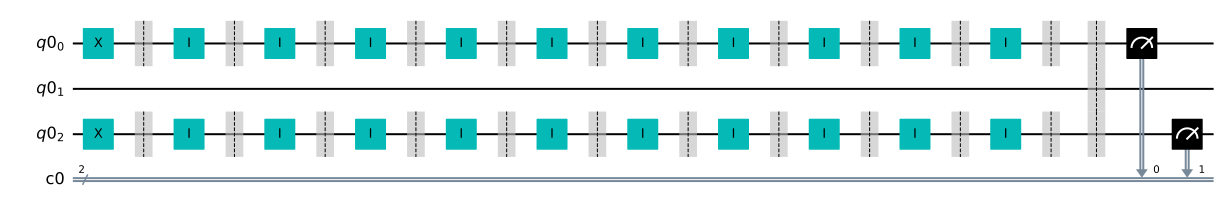

In [5]:
print('Total test circuits created: ', len(test_circuits))
print('Test circuit 1 with 1 Identity gate:')
test_circuits[0].draw()

Test circuit 2 with 10 Identity gates:


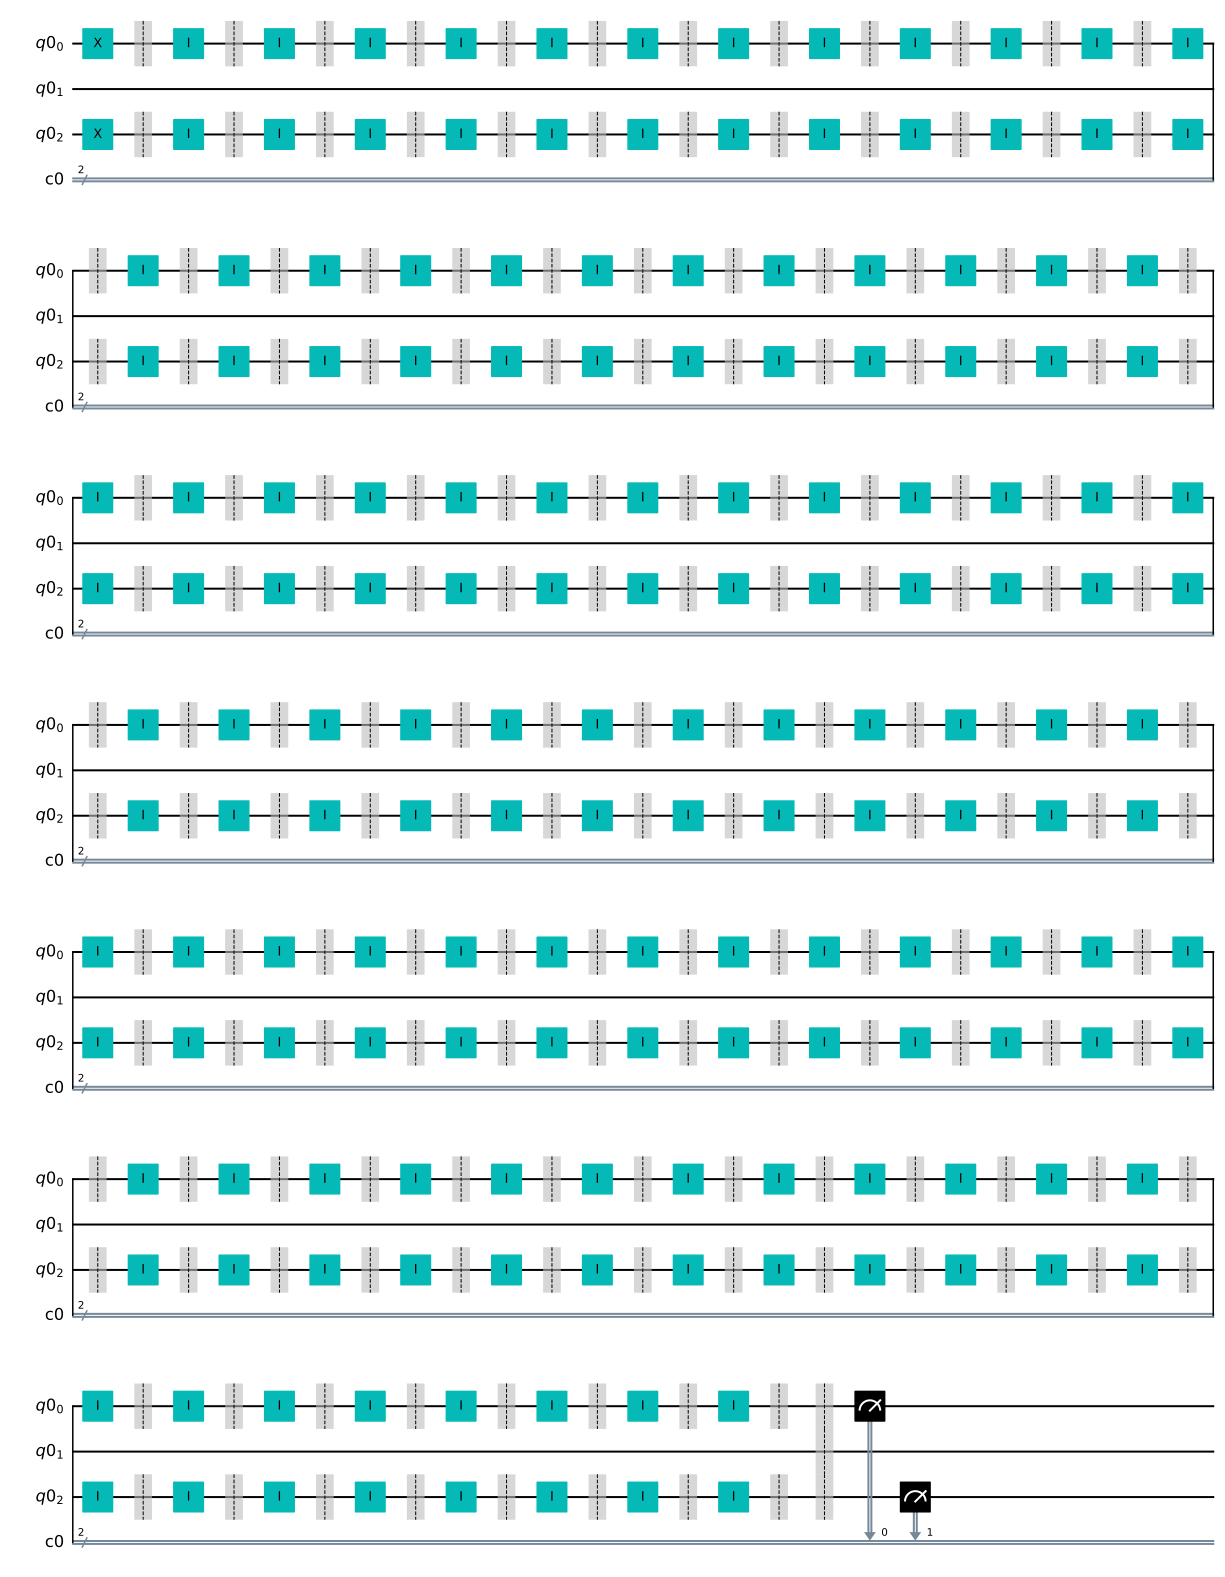

In [6]:
print('Test circuit 2 with 10 Identity gates:')
test_circuits[1].draw()

In [7]:
import qiskit
from qiskit.providers.aer.noise.errors.standard_errors \
            import thermal_relaxation_error
from qiskit.providers.aer.noise import NoiseModel

backend = qiskit.Aer.get_backend('qasm_simulator')
shots = 400

# Let the simulator simulate the following times for qubits 0 and 2:
t_q0 = 25.0
t_q2 = 15.0

# Define T\ :sub:`1` noise:
t1_noise_model = NoiseModel()
t1_noise_model.add_quantum_error(
thermal_relaxation_error(t_q0, 2*t_q0, gate_time),
                        'id', [0])
t1_noise_model.add_quantum_error(
    thermal_relaxation_error(t_q2, 2*t_q2, gate_time),
    'id', [2])

# Run the simulator
t1_backend_result = qiskit.execute(t1_circs, backend, shots=shots,
                                   noise_model=t1_noise_model,
                                   optimization_level=0).result()

Traceback (most recent call last):
  Input In [7] in <cell line: 23>
    t1_backend_result = qiskit.execute(t1_circs, backend, shots=shots,
NameError: name 't1_circs' is not defined

Use %tb to get the full traceback.


In [ ]:
# Plot the noisy results of the largest (last in the list) circuit
plot_histogram(backend_result.get_counts(test_circuits[0]))

In [ ]:
# Plot the noisy results of the largest (last in the list) circuit
plot_histogram(backend_result.get_counts(test_circuits[len(test_circuits)-1]))

In [ ]:
import matplotlib.pyplot as plt
from qiskit.ignis.characterization.coherence import T1Fitter

plt.figure(figsize=(15, 6))

t1_fit = T1Fitter(t1_backend_result, delay_times, qubits,
                  fit_p0=[1, t_q0, 0],
                  fit_bounds=([0, 0, -1], [2, 40, 1]))
#print(t1_fit.time())
#print(t1_fit.time_err())
#print(t1_fit.params)
#print(t1_fit.params_err)

for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    t1_fit.plot(i, ax=ax)
plt.show()

In [ ]:
t1_backend_result_new = qiskit.execute(t1_circs, backend,
                                       shots=shots,
                                       noise_model=t1_noise_model,
                                       optimization_level=0).result()
t1_fit.add_data(t1_backend_result_new)

plt.figure(figsize=(15, 6))
for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    t1_fit.plot(i, ax=ax)
plt.show()

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright